In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers, optimizers, utils, losses
import cv2
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 23s 0us/step


In [11]:
# x_train = x_train.astype('float32') / 255.0

array([9], dtype=uint8)

In [12]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [14]:
model = models.Sequential([
                           layers.Conv2D(64,3, strides=1, padding='same', input_shape=(x_train.shape[1:])),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Conv2D(64,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.MaxPooling2D(2,strides=2),

                           layers.Conv2D(128,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Conv2D(128,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.MaxPooling2D(2,strides=2),

                           layers.Conv2D(256,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Conv2D(256,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Conv2D(256,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.MaxPooling2D(2,strides=2),

                           layers.Conv2D(512,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Conv2D(512,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.Conv2D(512,3, strides=1, padding='same'),
                           layers.BatchNormalization(),
                           layers.Activation(activation='relu'),
                           layers.MaxPooling2D(2,strides=2),
                           layers.MaxPooling2D(2,strides=2),

                           layers.Flatten(),
                           layers.Dense(4096, activation ='relu'),
                           layers.Dropout(.5),
                           layers.Dense(4096, activation ='relu'),
                           layers.Dropout(.5),
                           layers.Dense(10, activation = 'softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

In [23]:
model.compile(optimizer='adam',
              loss = losses.categorical_crossentropy,
              metrics = ['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs = 10,
                    verbose=1,
                    validation_data = (x_test, y_test))


Epoch 1/10
98/98 [==============================] - 30s 244ms/step - loss: 1.8574 - accuracy: 0.2280 - val_loss: 2.0785 - val_accuracy: 0.1989
Epoch 2/10
98/98 [==============================] - 19s 193ms/step - loss: 1.7210 - accuracy: 0.2970 - val_loss: 2.0615 - val_accuracy: 0.2377
Epoch 3/10
98/98 [==============================] - 19s 193ms/step - loss: 1.5839 - accuracy: 0.3667 - val_loss: 2.2964 - val_accuracy: 0.1843
Epoch 4/10
98/98 [==============================] - 19s 194ms/step - loss: 1.4244 - accuracy: 0.4220 - val_loss: 1.8691 - val_accuracy: 0.2955
Epoch 5/10
98/98 [==============================] - 19s 194ms/step - loss: 1.2764 - accuracy: 0.4842 - val_loss: 1.7779 - val_accuracy: 0.3315
Epoch 6/10
98/98 [==============================] - 19s 194ms/step - loss: 1.1524 - accuracy: 0.5495 - val_loss: 1.8243 - val_accuracy: 0.3829
Epoch 7/10
98/98 [==============================] - 19s 195ms/step - loss: 1.0519 - accuracy: 0.5926 - val_loss: 1.3760 - val_accuracy: 0.5115

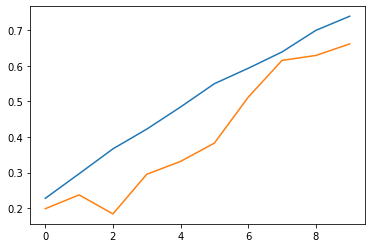

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [26]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score[0], score[1])
predictions = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0711 - accuracy: 0.6610
1.0710855722427368 0.6610000133514404
